In [ ]:
'''
Try running the second block before rerunning this!
'''

# Info on how to get your api key (kaggle.json) here: https://github.com/Kaggle/kaggle-api#api-credentials
!pip install kaggle
api_token = {"username":"ruiming100","key":"35187b07092ea7896a51a932fc7643f3"}
import json
import zipfile
import os

!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

if not os.path.exists("/content/datasets/gpiosenka/100-bird-species"):
    os.makedirs("/content/datasets/gpiosenka/100-bird-species")
os.chdir("/content/datasets/gpiosenka/100-bird-species")
!chmod 600 /content/.kaggle/kaggle.json

!cp /content/.kaggle/kaggle.json ~/root/.kaggle/kaggle.json
!kaggle config set -n path /content
!kaggle datasets download -d gpiosenka/100-bird-species
# !pwd
# print(os.listdir())
for file in os.listdir():
  if os.path.isfile(file):
    zip_ref = zipfile.ZipFile(os.path.join(os.getcwd(), file), 'r')
    zip_ref.extractall()
    zip_ref.close()

cp: cannot stat '/content/.kaggle/kaggle.json': No such file or directory
chmod: cannot access '/content/.kaggle/kaggle.json': No such file or directory
cp: cannot stat '/content/.kaggle/kaggle.json': No such file or directory
usage: kaggle config set [-h] -n NAME -v VALUE
kaggle config set: error: argument -v/--value is required
 99% 1.39G/1.40G [00:28<00:00, 90.4MB/s]
100% 1.40G/1.40G [00:28<00:00, 52.2MB/s]


VGG extraction

PCA

Reconsturction error

Kmeans

GMM

Logistic

Distortion

Entropy

Most common label in cluster

Most representative picture in cluster

Plot images in cluster


In [ ]:
import os
### Exploring Dataset
DIR_TRAIN = "/content/datasets/gpiosenka/100-bird-species/train/" #../input/100-bird-species/train/"
DIR_VALID = "/content/datasets/gpiosenka/100-bird-species/valid/"#../input/100-bird-species/valid/"
DIR_TEST = "/content/datasets/gpiosenka/100-bird-species/test/"
classes = os.listdir(DIR_TRAIN)
print("Total Classes: ",len(classes))

#Counting total train, valid & test images
train_count = 0
valid_count = 0
test_count = 0
for _class in classes:
    train_count += len(os.listdir(DIR_TRAIN + _class))
    valid_count += len(os.listdir(DIR_VALID + _class))
    test_count += len(os.listdir(DIR_TEST + _class))

print("Total train images: ",train_count)
print("Total valid images: ",valid_count)
print("Total test images: ",test_count)

Total Classes:  230
Total train images:  32025
Total valid images:  1150
Total test images:  1150


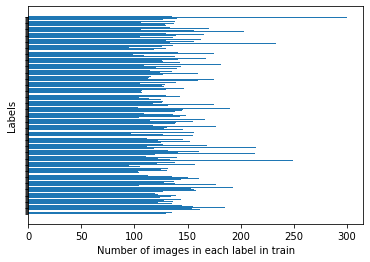

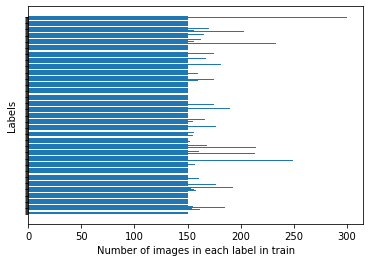

168
SORA 300
AMERICAN KESTREL 150


In [ ]:
### Creating a list of all images : DIR_TRAIN/class_folder/img.jpg - FOR METHOD 2 of data loading
#   A dict for mapping class labels to index

train_imgs = []
valid_imgs = []
test_imgs = []


train_labels = []
train_labels_count = []

for _class in classes:
    train_labels.append(_class)
    train_labels_count.append(0)
    for img in os.listdir(DIR_TRAIN + _class):
        train_labels_count[-1]+=1

import matplotlib.pyplot as plt
plot = plt.barh(train_labels,train_labels_count)
plt.yticks(train_labels, "")
plt.xlabel("Number of images in each label in train")
plt.ylabel("Labels")
plt.show()


from PIL import Image, ImageOps
for i,_class in enumerate(classes):
    to_add = 150-train_labels_count[i]
    for img in os.listdir(DIR_TRAIN + _class):
        if to_add<=0:
          break
        else:
          im = Image.open(DIR_TRAIN + _class + "/" + img)
          im_flip = ImageOps.mirror(im)
          im_flip.save(DIR_TRAIN + _class + "/flip" + img, quality=95)
          to_add-=1


train_labels = []
train_labels_count = []

for _class in classes:
    train_labels.append(_class)
    train_labels_count.append(0)
    for img in os.listdir(DIR_TRAIN + _class):
        train_labels_count[-1]+=1

import matplotlib.pyplot as plt
plot = plt.barh(train_labels,train_labels_count)
plt.yticks(train_labels, "")
plt.xlabel("Number of images in each label in train")
plt.ylabel("Labels")
plt.show()


for _class in classes:
    for img in os.listdir(DIR_TRAIN + _class):
        train_imgs.append(DIR_TRAIN + _class + "/" + img)
    
    for img in os.listdir(DIR_VALID + _class):
        valid_imgs.append(DIR_VALID + _class + "/" + img)
        
    for img in os.listdir(DIR_TEST + _class):
        test_imgs.append(DIR_TEST + _class + "/" + img)

class_to_int = {classes[i] : i for i in range(len(classes))}


import operator
maxindex, maxvalue = max(enumerate(train_labels_count), key=operator.itemgetter(1))
minindex, minvalue = min(enumerate(train_labels_count), key=operator.itemgetter(1))
print(sum(1 for x in train_labels_count if x>=100 and x<=150))
print(train_labels[maxindex],maxvalue)
print(train_labels[minindex],minvalue)

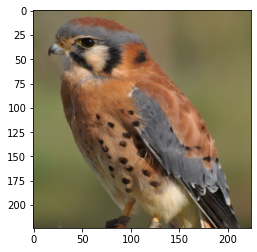

In [ ]:
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow
import numpy as np

for _class in classes:    
    for img in os.listdir(DIR_TRAIN + _class):
      im = Image.open(DIR_TRAIN + _class + "/" + img)
      im_flip = ImageOps.mirror(im)
      imshow(np.asarray(im_flip))
      #im_flip.save(DIR_TRAIN + _class + "/flip" + img, quality=95)
      break
    break




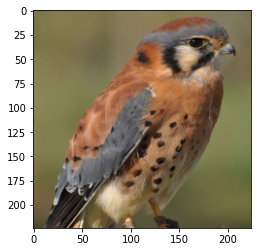

In [ ]:
for _class in classes:    
    for img in os.listdir(DIR_TRAIN + _class):
      im = Image.open(DIR_TRAIN + _class + "/" + img)
      im_flip = ImageOps.mirror(im)
      imshow(np.asarray(im))
      #im_flip.save(DIR_TRAIN + _class + "/flip" + img, quality=95)
      break
    break


In [ ]:
def get_labels(dir):
  '''
  Get a list of labels in directory in order
  '''
  labels = []
  for _class in classes:
      for img in os.listdir(dir + _class):
          labels.append(_class)
  return labels

In [ ]:
def make_dataset(dir_train,dir_test,dir_valid):
  '''
  Make dataset from directory
  Input: directory of dataset
  Example: "/content/datasets/gpiosenka/100-bird-species/train/"
  ''' 
  import tensorflow as tf

  # dataset is a numpy array of tensor shaped EXPECTED_DIM
  # features will be a numpy array of (dataset_rows, 25088)
  dataset_train = tf.keras.preprocessing.image_dataset_from_directory(dir_train,image_size=(224, 224),labels='inferred')
  dataset_test = tf.keras.preprocessing.image_dataset_from_directory(dir_test,image_size=(224, 224),labels='inferred')
  dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(dir_valid,image_size=(224, 224),labels='inferred')
  
  #data_labels = dataset.labels
  #print(labels)

  return dataset_train,dataset_test,dataset_valid

In [ ]:
def scale(dataset):
  '''
  Normalize dataset
  Input: dataset
  '''
  from tensorflow.keras import layers
  normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
  normalized_ds = dataset.map(lambda x, y: (normalization_layer(x), y))
  return normalized_ds

In [ ]:
def extract(dataset):
  '''
  Extract feature from dataset
  Input: dataset
  '''
  from keras.applications.vgg16 import VGG16
  from keras.models import Model
  from keras.layers import Input, Flatten
  import tensorflow as tf

  # VGG16 standard input shape
  EXPECTED_DIM = (224, 224, 3)
  vgg16 = VGG16(weights='imagenet', include_top=False)
  input = Input(shape=EXPECTED_DIM, name='input')
  output = vgg16(input)
  x = Flatten(name='flatten')(output)
  extractor = Model(inputs=input, outputs=x)
  return extractor.predict(dataset)

In [ ]:
def plot(dataset):
  '''
  Plot and visualize a dataset 
  Input: a dataset
  '''
  import matplotlib.pyplot as plt
  
  plt.figure(figsize=(10, 10))
  class_names = dataset.class_names
  for images, labels in dataset.take(1):
      for i in range(9):
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_names[labels[i]])
          plt.axis("off")

In [ ]:
def pca(features,n_components):
  '''
  Dimensionality reduction on extracted features
  Input: dataset to do PCA, number of components
  '''
  from sklearn.decomposition import PCA
  print(features.shape)

  pca = PCA(n_components=500)
  pca.fit(features)
  reduced_features = pca.transform(features)
  print(reduced_features.shape)
  return reduced_features

In [ ]:
def variance_explain():
  '''
  TODO COMPLETE FUNCTION
  Check the quality of PCA
  '''

In [ ]:
def k_means(dataset,num_clusters,max_iter,n_runs):
  '''
  k-means clustering
  The number of clusters to form as well as the number of centroids to generate.
  num_clusters = 50
  Maximum number of iterations of the k-means algorithm for a single run.
  max_iter = 500
  Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
  n_runs = 20
  '''
  from sklearn.cluster import KMeans
  kmeans = KMeans(
      n_clusters=num_clusters, init='random',
      n_init=n_runs, max_iter=max_iter, 
      tol=1e-04, random_state=0
  )

  y_pred_km = kmeans.fit_predict(dataset)
  distortion = kmeans.inertia_
  centroids = kmeans.cluster_centers_

  return y_pred_km,centroids,distortion


In [ ]:
def GMM(dataset,num_clusters,max_iter,n_runs):
  '''
  TODO: TEST AND EXTEND DISTORTION MEASURES ETC
  GMM
  # The number of clusters to form as well as the number of centroids to generate.
  num_clusters = 50
  # Maximum number of iterations of the k-means algorithm for a single run.
  max_iter = 300
  #Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
  n_runs = 10  
  '''

  GMM = GaussianMixture(
      n_components=num_clusters,
      n_init=n_runs, max_iter=max_iter, 
      tol=1e-04, random_state=0
  )

  y_pred_gmm = GMM.fit_predict(reduced_features)

  return y_pred_gmm

In [ ]:
def make_cluster_labels(labels,pred):
  '''
  Make a dictionary with (key:cluster name) and (value:list of image labels)
  '''
  cluster_labels = {}
  for i in range(len(pred)):
      cluster = pred[i]
      if cluster not in cluster_labels:
          cluster_labels[cluster] = []
      cluster_labels[cluster]+=[labels[i]]
  return cluster_labels

In [ ]:
def make_cluster_images(images,pred):
  '''
  Make a dictionary with (key:cluster name) and (value:list of image names)
  '''      
  results_images = {}
  for i in range(len(pred)):
      cluster = pred[i]
      if cluster not in results_images:
          results_images[cluster] = []
      results_images[cluster].append(images[i])
  return results_images

In [ ]:
def most_common_label_of_cluster(results_labels):
  '''
  Find majority label of clusters
  Input: dictionary with (key:cluster name) and (value:list of image labels)
  Return: dictionary with (key:cluster name) and (value:most common label)
  '''
  return {k:max(set(v), key=v.count) for k,v in results.items()}

In [ ]:
def clusters_entropy(results_labels):
  '''
  Calculate entropy of clustering
  Input: dictionary with (key:cluster name) and (value:image labels)
  '''
  # count of label occurrences in each class
  import collections
  import numpy as np

  entropy = 0
  total_size = sum([len(v) for v in results_labels.values()])
  count_results = {k:collections.Counter(v) for k,v in results_labels.items()}

  for cluster,birds_and_freq in count_results.items():
    cluster_size = len(results_labels[cluster])
    cluster_entropy = 0
    for bird, freq in birds_and_freq.items():
      cluster_entropy+=freq/cluster_size*np.log2(freq/cluster_size)
    entropy-=cluster_entropy*cluster_size/total_size

  return entropy


In [ ]:
def top_k_representative_images(k,centroids,features,cluster_assignment):
  '''
  Get k features/images that are closest to cluster centriods
  '''
  import copy
  from scipy.cluster.vq import vq

  features_copy = copy.deepcopy(features)
  closest = []
  k_closests = []
  for iter in range(k):
      # remove those already found in the closest from feature copy
      features_copy = [features_copy[i] for i in range(len(features_copy)) if i not in closest] 
      closest, distances = vq(centroids, features_copy)
      k_closests.append(closest)
  return k_closests


In [ ]:
def plot_clusters(num_clusters,results_imgs):
  '''
  Plot and visualize clusters
  Input: dictionary with (key:cluster name) and (value:list of image names)
  '''
  import cv2
  import matplotlib.pyplot as plt
  rows = num_clusters
  counter = 0
  fig, ax = plt.subplots(figsize=(50,50))
  for k in sorted(results_imgs):
    v = results_imgs[k]
    for i in range(min(2,len(v))):
      plt.subplot(rows,2,counter+1)
      plt.axis('off')
      plt.title("c"+str(k)+"_"+v[i][51:-6])
      plt.imshow(cv2.imread(v[i]))
      counter+=1
  plt.show()

In [ ]:
def logisticRegression(X_train,X_test,y_train,y_test):
  '''
  Simple logistic regression
  '''
  clf = LogisticRegression(random_state=0).fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  training_accuracy=accuracy_score(y_train,clf.predict(X_train))
  testing_accuracy=accuracy_score(y_test,y_pred)
  return y_pred,raining_accuracy,testing_accuracy

Found 36045 files belonging to 230 classes.
Found 1150 files belonging to 230 classes.
Found 1150 files belonging to 230 classes.


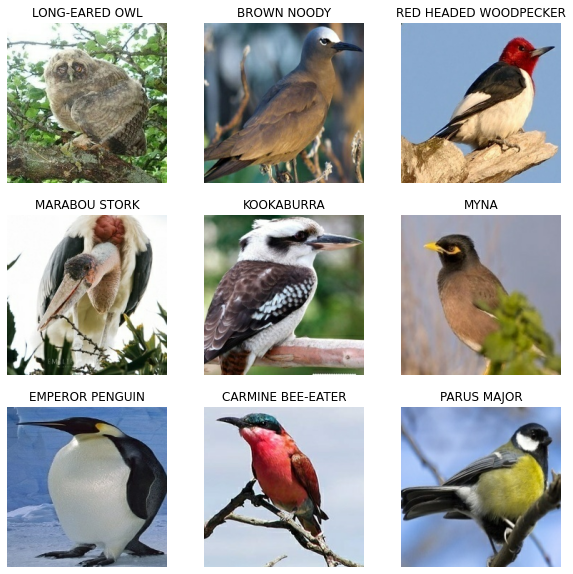

In [ ]:
'''
MAIN RUN
'''
use_valid_for_now = True

# Create dataset
ds_train, ds_test, ds_valid = make_dataset(DIR_TRAIN,DIR_TEST,DIR_VALID)
ds_train_n, ds_test_n, ds_valid_n = scale(ds_train),scale(ds_test),scale(ds_valid)
plot(ds_train)

In [ ]:
if not use_valid_for_now:
  features_train = extract(ds_train_n) # separated code block in case someone fails

In [ ]:
if not use_valid_for_now:
  features_test = extract(ds_test_n) # separated code block in case someone fails

In [ ]:
features_valid = extract(ds_valid_n) # separated code block in case someone fails

58892288/58889256 [==============================] - 1s 0us/step


(1150, 25088)
(1150, 500)
distortion: 1699029.1832842382
entropy: 6.584688787422145


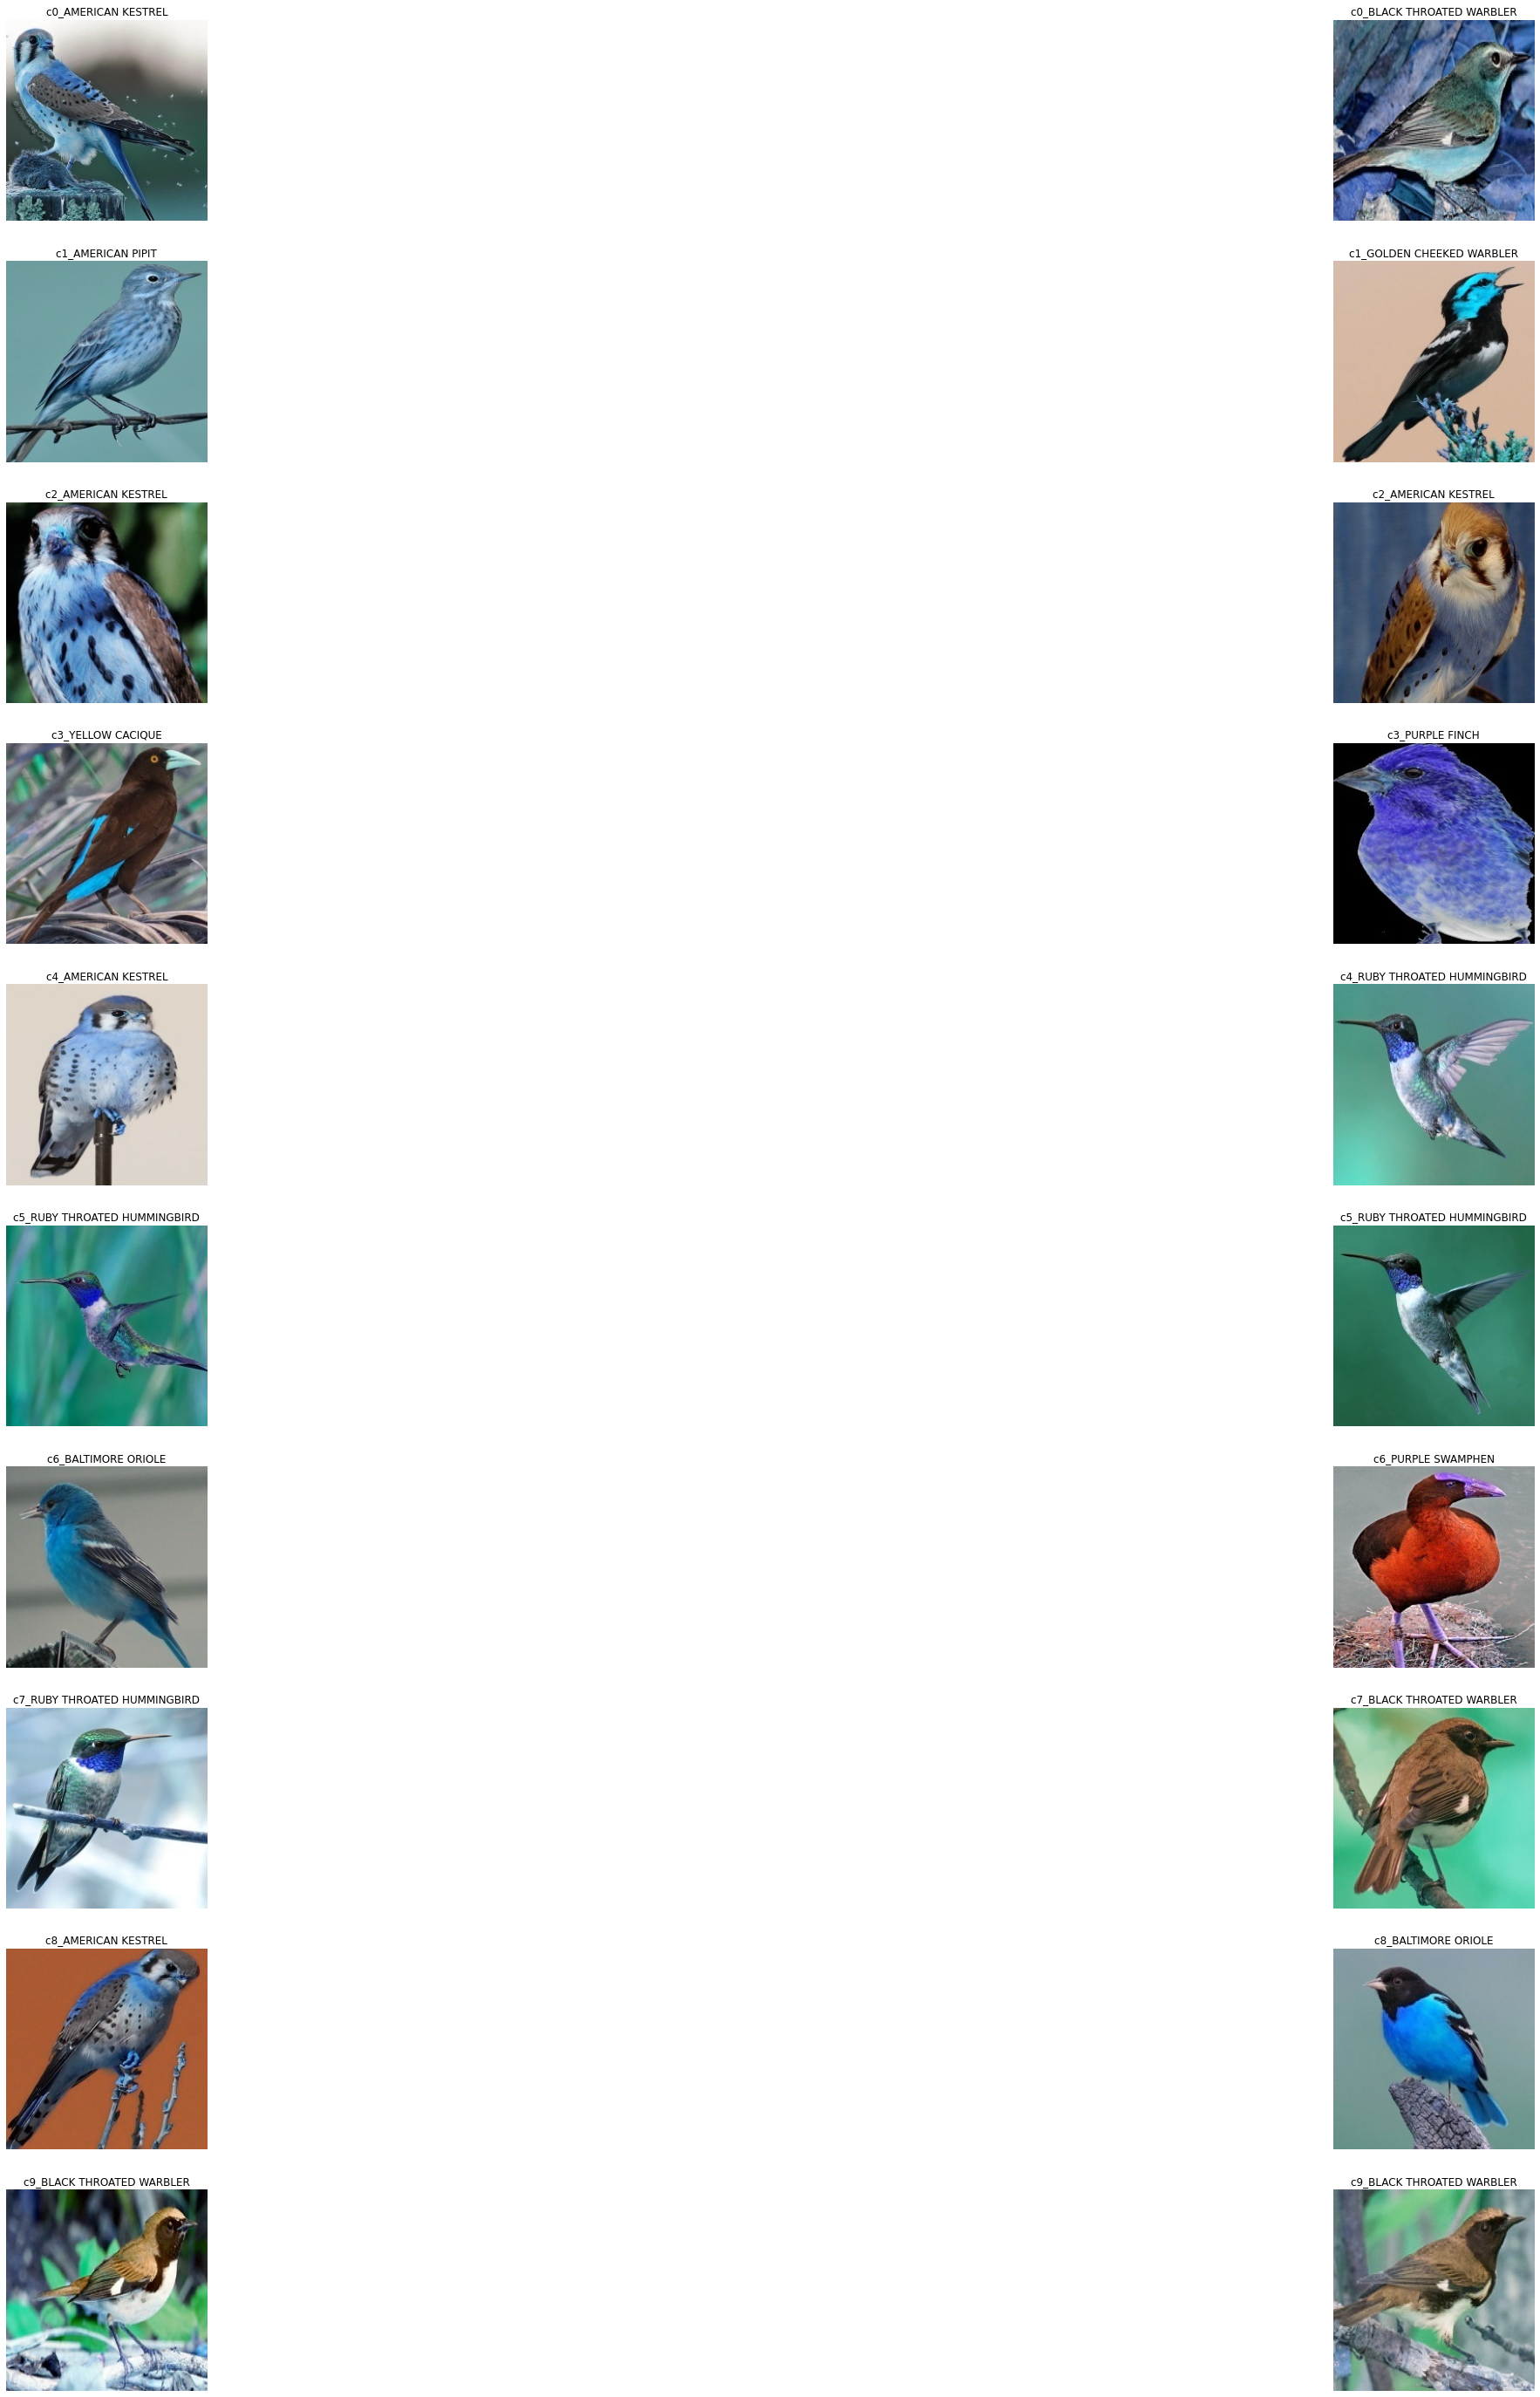

k_closest: [array([ 854, 1074,  883,  548, 1081,  123,   72,  848,  685,  186],
      dtype=int32), array([915, 200, 915, 675,  72, 215, 237, 552, 215, 743], dtype=int32), array([  83,  121, 1097,  829,  934,  194, 1027,  815,  194,  115],
      dtype=int32), array([ 640,  191, 1000,  811,  945, 1010,  181,  726,  508, 1016],
      dtype=int32), array([ 757,  441,  831, 1031,  837,  659,  138,   84,  182,  962],
      dtype=int32)]


'\nTODO:\nfor unsupervised clustering:\n  implement GMM\n  implement pca,gmm variance explain\n  problem with plotting, Ray will fix it later\nfor unsupervised classification:\n  use most_common_label_of_cluster() as a classifier and run it on test set and verify accuracy? \nfor supervised classification:\n  use logisticRegression to train and make predictions\nfor overall pipeline:\n  wrap the main codes in a for loop to do hyperparameter search \n'

In [ ]:
'''
CONTINUE MAIN RUN
'''
# Dimension reduce
num_components = 5000
if use_valid_for_now:
  features_train_r = pca(features_valid,num_components)
else:
  features_train_r = pca(features_train,num_components)
  features_test_r = pca(features_train,num_components)
  features_valid_r = pca(features_valid,num_components)

# Clustering
num_clusters = 10
max_iter = 300
n_runs = 10  
train_pred,train_centriods,train_distortion = k_means(features_train_r,num_clusters,max_iter,n_runs)
print("distortion:",train_distortion)

# Print cluster entropy
if use_valid_for_now:
  train_labels = get_labels(DIR_VALID)
else:
  train_labels = get_labels(DIR_TRAIN)
cluster_labels_train = make_cluster_labels(train_labels,train_pred)
entropy_train = clusters_entropy(cluster_labels_train)
print("entropy:",entropy_train)

# Plot images in cluster
if use_valid_for_now:
  train_imgs = valid_imgs
cluster_images_train = make_cluster_images(train_imgs,train_pred)
plot_clusters(num_clusters,cluster_images_train)

# Get k most representative clusters indexes
k=5
k_closest_train = top_k_representative_images(k,train_centriods,features_train_r,train_pred)
print("k_closest:",k_closest_train)

for test_img in features_test:
  

'''
TODO:
for unsupervised clustering:
  implement GMM
  implement pca,gmm variance explain
  problem with plotting, Ray will fix it later
for unsupervised classification:
  use most_common_label_of_cluster() as a classifier and run it on test set and verify accuracy? 
for supervised classification:
  use logisticRegression to train and make predictions
for overall pipeline:
  wrap the main codes in a for loop to do hyperparameter search 
'''


--------OLD CODE BELOW--------

In [ ]:
raise Exception("old code")

'''
Analyzing entropy results from kmeans
'''
counter = 0
labels = []
results_images = {}
results_labels = {}
images = valid_imgs
for _class in classes:
    for img in os.listdir(DIR_VALID + _class):
        labels.append(_class)
      
# store cluster - image pairs       
for i in range(len(y_pred_km)):
    cluster = y_pred_km[i]
    if cluster not in results_images:
        results_images[cluster] = []
    results_images[cluster].append(images[i])

# store cluster - label pairs       
for i in range(len(y_pred_km)):
    cluster = y_pred_km[i]
    if cluster not in results_labels:
        results_labels[cluster] = []
    results_labels[cluster].append(labels[i])







#print(count_results)

# '''
# most representative picture
# import copy
# from scipy.cluster.vq import vq
# def get_k_cloest(k,features):
#     features_copy = copy.deepcopy(features)
#     closest = []
#     k_closests = []
#     for iter in range(k):
#         features_copy = [features_copy[i] for i in range(len(features_copy)) if i not in closest]
#         closest, distances = vq(centroids, features_copy)
#         k_closests.append(closest)
#     return k_closests

# k = 5
# k_cls = get_k_cloest(k,features)
# '''
    


Exception: ignored

In [ ]:
'''
Plot and visualize clusters
'''
import cv2
rows = num_clusters
counter = 0
fig, ax = plt.subplots(figsize=(400,400))
for k in sorted(results):
  v = results[k]
  for i in range(min(5,len(v))):
    plt.subplot(rows,5,counter+1)
    plt.axis('off')
    plt.title("c"+str(k)+"_"+v[i][51:-6])
    plt.imshow(cv2.imread(v[i]))
    counter+=1

In [ ]:
'''
make training dataset with labels
'''
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/datasets/gpiosenka/100-bird-species/train/',
  image_size=(224, 224),labels='inferred')

#normalize
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds_train = dataset_train.map(lambda x, y: (normalization_layer(x), y))

#extract features
features = extractor.predict(normalized_ds_train)





In [ ]:
'''
do logistic regressions
'''
train_labels = []
for _class in classes:
    for img in os.listdir(DIR_TRAIN + _class):
        train_labels.append(_class)
y = train_labels #using valid for now
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)
y_encoded = label_encoder.fit_transform(y)
y_integer = y_encoded.reshape(len(y_encoded), 1)

X = features
X_train, X_test, y_train, y_test = train_test_split(X, y_integer, test_size=0.33, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("training accuracy:",accuracy_score(y_train,clf.predict(X_train)))
print("testing accuracy:", accuracy_score(y_test,y_pred))


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

#extract test features
test_features = extractor.predict(normalized_ds)


In [ ]:

"""
train_labels = []
for _class in classes:
    for img in os.listdir(DIR_TRAIN + _class):
        train_labels.append(_class)
"""
train_labels=labels #using valid for now
features = reduced_features
test_labels = []
for _class in classes:
    for img in os.listdir(DIR_TEST + _class):
        test_labels.append(_class)

# train_values = array(train_labels)
# test_values = array(test_labels)

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

train_integer_encoded = label_encoder.fit_transform(train_values)
test_integer_encoded = label_encoder.fit_transform(test_values)

train_integer_encoded = train_integer_encoded.reshape(len(train_integer_encoded), 1)
test_integer_encoded = test_integer_encoded.reshape(len(test_integer_encoded), 1)

train_onehot_encoded = onehot_encoder.fit_transform(train_integer_encoded)
test_onehot_encoded = onehot_encoder.fit_transform(test_integer_encoded)

print(features.shape)
print(train_integer_encoded)
print(test_integer_encoded)
print(train_onehot_encoded.shape)

train_integer_encoded = np.reshape(train_integer_encoded, (1,1150))
train_integer_encoded = np.reshape(test_integer_encoded, (1,1150))

clf = LogisticRegression(random_state=0).fit(features, train_integer_encoded)
print('ere')
clf.predict(test_features)
print('here2')
clf.score(test_features, test_integer_encoded)
print('here3')
#print(np.unique(integer_encoded))

In [ ]:
TRASH CODE
'''
VGG19 USING TENSORFLOW
'''

# from tensorflow.keras.applications.vgg19 import VGG19
# from tensorflow.keras.preprocessing import image

# from tensorflow.keras.applications.vgg19 import preprocess_input
# from tensorflow.keras.models import Model

# import numpy as np

# model = VGG19(weights='imagenet', include_top=False)
# img_path = train_imgs[0]

# img = image.load_img(img_path,target_size=(224,224))
# x = image.img_to_array(img)

# x = np.expand_dims(x, axis=0)

# x = preprocess_input(x)

# features = model.predict(x)

# print(features.shape)

# print(features)
